In [33]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

seed = 42
pd.set_option('display.max_columns', None)

#  PARTE 1

## Obtener los datos del "Credit Approval Dataset"

In [34]:
ruta = "../data/Electricity.xlsx"
df = pd.read_excel(ruta)
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,class
0,0.000044,3,0.063830,0.044374,0.316721,0.003467,0.422915,0.414912,1
1,0.000044,3,0.085106,0.041041,0.257959,0.003467,0.422915,0.414912,1
2,0.000044,3,0.106383,0.041161,0.214073,0.003467,0.422915,0.414912,1
3,0.000044,3,0.127660,0.041161,0.178816,0.003467,0.422915,0.414912,1
4,0.000044,3,0.148936,0.040951,0.151889,0.003467,0.422915,0.414912,1


In [35]:
df.shape
# 2400 vectores
# 9 características

(2400, 9)

In [36]:
card_pos = len(df[df['class'] == 2])
card_neg = len(df[df['class'] == 1])

print(f'IR: = {np.round(card_neg / card_pos, 4)}')
# Apenas pasa como balanceado

IR: = 1.4742


## Ubicar valores nulos, repetidos e indiscernibles

In [37]:
# Sin valores nulos
df.isnull().sum()

feat_1    0
feat_2    0
feat_3    0
feat_4    0
feat_5    0
feat_6    0
feat_7    0
feat_8    0
class     0
dtype: int64

In [38]:
# Valores repetidos
df.duplicated().sum()

np.int64(0)

In [39]:
# Valores indiscernibles
X = df.drop('class', axis = 1)
Y = df['class']

df_copia = df.copy()

indiscernibles = df_copia.groupby(list(X.columns))['class'].nunique()
indiscernibles = indiscernibles[indiscernibles > 1]
len(indiscernibles)


0

## Limpieza de nulos, repetidos e indiscernibles  

In [40]:
# nulos
df = df.dropna()

# repetidos
df = df.drop_duplicates(keep = 'first')

# indiscernibles
mask = df.groupby(list(X.columns))['class'].transform('nunique')>1
df = df[~mask]

df.shape

(2400, 9)

In [41]:
df.shape
# 653 vectores
# 15 características
# Parece que estaba limpio

(2400, 9)

## Revolver datos porque vienen ordenados y me van a sesgar el modelo

In [42]:
df = df.sample(frac = 1)
df['class'].value_counts()
# 1 --> clase negativa
# 2 --> clase positiva

class
1    1430
2     970
Name: count, dtype: int64

In [43]:
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,class
515,0.000929,2,0.617021,0.043833,0.450907,0.003467,0.422915,0.414912,1
1526,0.000221,7,0.510638,0.071694,0.308242,0.003467,0.422915,0.414912,2
895,0.004425,5,0.680851,0.050168,0.496578,0.003467,0.422915,0.414912,1
1430,0.000044,3,0.000000,0.059235,0.442874,0.003467,0.422915,0.414912,2
166,0.000310,2,0.170213,0.077999,0.157542,0.003467,0.422915,0.414912,1


## Reetiquetar las clases

In [44]:
# Etiqueta de clase numérica con un diccionario
# 0 --> clase negativa
# 1 --> clase positiva
df['class'] = df['class']-1
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,class
515,0.000929,2,0.617021,0.043833,0.450907,0.003467,0.422915,0.414912,0
1526,0.000221,7,0.510638,0.071694,0.308242,0.003467,0.422915,0.414912,1
895,0.004425,5,0.680851,0.050168,0.496578,0.003467,0.422915,0.414912,0
1430,0.000044,3,0.000000,0.059235,0.442874,0.003467,0.422915,0.414912,1
166,0.000310,2,0.170213,0.077999,0.157542,0.003467,0.422915,0.414912,0


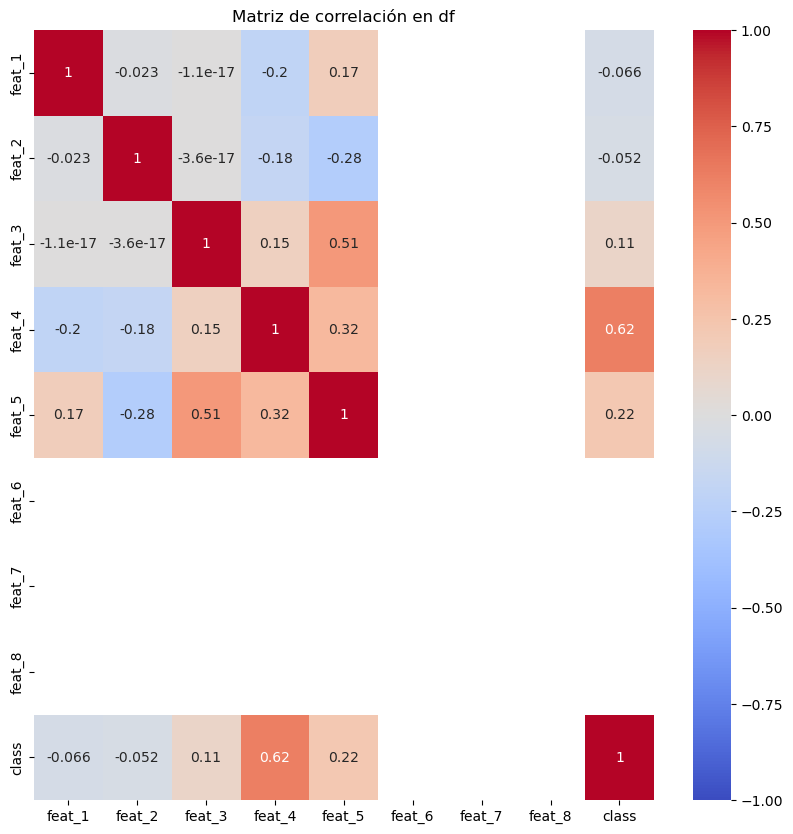

In [45]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.title("Matriz de correlación en df")
plt.show()
# Hay que quitarle las características 6, 7 y 8 porque son constantes.

In [46]:
col_const = [f'feat_{i}' for i in range(6, 9)]
df.drop(columns = col_const, inplace = True)
df.head()


,feat_1,feat_2,feat_3,feat_4,feat_5,class
515,0.000929,2,0.617021,0.043833,0.450907,0
1526,0.000221,7,0.510638,0.071694,0.308242,1
895,0.004425,5,0.680851,0.050168,0.496578,0
1430,0.000044,3,0.000000,0.059235,0.442874,1
166,0.000310,2,0.170213,0.077999,0.157542,0


## Normalización de las características numericas


In [47]:
# Estandarizar para que no afecte a los algoritmos basados en distancias como el SVM o los KNN
scaler = MinMaxScaler()

numericos = [col for col in df.columns if col != 'class']

df_numericos_scaled = scaler.fit_transform(df[numericos])
df_numericos_scaled = pd.DataFrame(df_numericos_scaled, columns = numericos)
df_numericos_scaled.head()

,feat_1,feat_2,feat_3,feat_4,feat_5
0,0.169508,0.166667,0.617021,0.012072,0.506721
1,0.033902,1.000000,0.510638,0.119803,0.325128
2,0.839111,0.666667,0.680851,0.036568,0.564854
3,0.000000,0.333333,0.000000,0.071627,0.496496
4,0.050948,0.166667,0.170213,0.144183,0.133307


## Unir los numericos normalizados con la clase en un df final

In [48]:
df_final = pd.concat([df_numericos_scaled.reset_index(drop = True), 
                      df['class'].reset_index(drop = True)], axis = 1)
df_final.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,class
0,0.169508,0.166667,0.617021,0.012072,0.506721,0
1,0.033902,1.000000,0.510638,0.119803,0.325128,1
2,0.839111,0.666667,0.680851,0.036568,0.564854,0
3,0.000000,0.333333,0.000000,0.071627,0.496496,1
4,0.050948,0.166667,0.170213,0.144183,0.133307,0


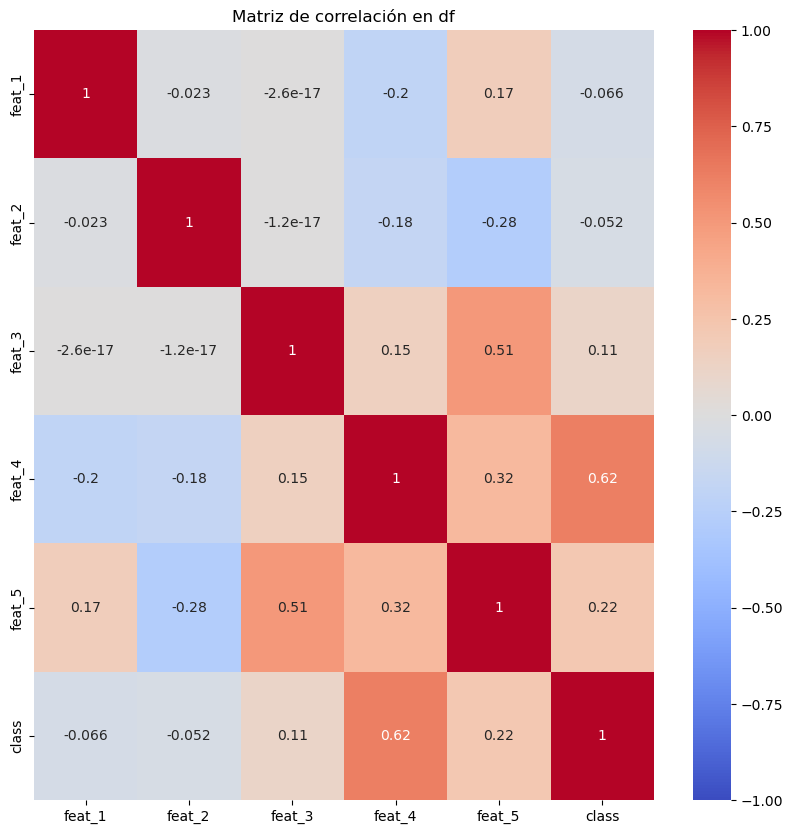

In [49]:
corr_matrix = df_final.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.title("Matriz de correlación en df")
plt.show()

## Guardar Dataset FInal

In [50]:
df_final.to_csv('../data/Electricity_limpio.csv', index = False)

# PARTE 2

## Obtener los datos del "CStudents' Dropout and Academic Success"

In [51]:
ruta = "../data/dropout.csv"
df = pd.read_csv(ruta, sep = ';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [52]:
df.shape

(4424, 37)

In [53]:
minimo = df['Target'].value_counts().min()
maximo = df['Target'].value_counts().max()
print(f'IR: {np.round(maximo / minimo)}')
# Está desbalanceado


IR: 3.0


## Separar las características de la etiqueta

In [54]:
X = df.drop(columns=['Target'])
y = df['Target']

In [55]:
numericas = X.select_dtypes(include = 'number')
categoricas = X.select_dtypes(exclude = 'number')
# Realmente solo la columna Target es la categórica

In [56]:
numericas

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


## Normalizar los datos con rango [0,1]

In [57]:
#  Normalización de las características
normalizador = MinMaxScaler()

columnas = [col for col in numericas.columns]

X_normalizado = normalizador.fit_transform(numericas)
X_normalizado = pd.DataFrame(X_normalizado, columns = columnas)
X_normalizado.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.0,0.418605,0.255814,0.025773,0.046154,0.340000,1.0,0.0,0.0,1.0,1.0,0.0,0.056604,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.0,0.000000,0.046512,0.015464,0.015385,0.500000,1.0,0.0,0.0,0.0,1.0,0.0,0.037736,0.0,0.0,0.230769,0.133333,0.230769,0.741722,0.0,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.0,0.837209,0.837209,0.046392,0.046154,0.313684,1.0,0.0,0.0,0.0,1.0,0.0,0.037736,0.0,0.0,0.230769,0.000000,0.000000,0.000000,0.0,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.0,0.860465,0.837209,0.025773,0.015385,0.258947,1.0,0.0,0.0,1.0,0.0,0.0,0.056604,0.0,0.0,0.230769,0.177778,0.230769,0.711447,0.0,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.0,0.837209,0.860465,0.046392,0.046154,0.489474,0.0,0.0,0.0,1.0,0.0,0.0,0.528302,0.0,0.0,0.230769,0.200000,0.192308,0.653422,0.0,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687


## Transformación a numerico para las etiquetas

In [58]:
y = y.replace({'Graduate':0, 'Dropout': 1, 'Enrolled':3})
y.value_counts()

/tmp/ipykernel_21578/2690916211.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Graduate':0, 'Dropout': 1, 'Enrolled':3})


Target
0    2209
1    1421
3     794
Name: count, dtype: int64

## Unir numericos con la etiqueta

In [59]:
df = pd.concat([X_normalizado,y], ignore_index = False, axis = 1)
df.shape

(4424, 37)

## Buscar algunas columnas redundantes

/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


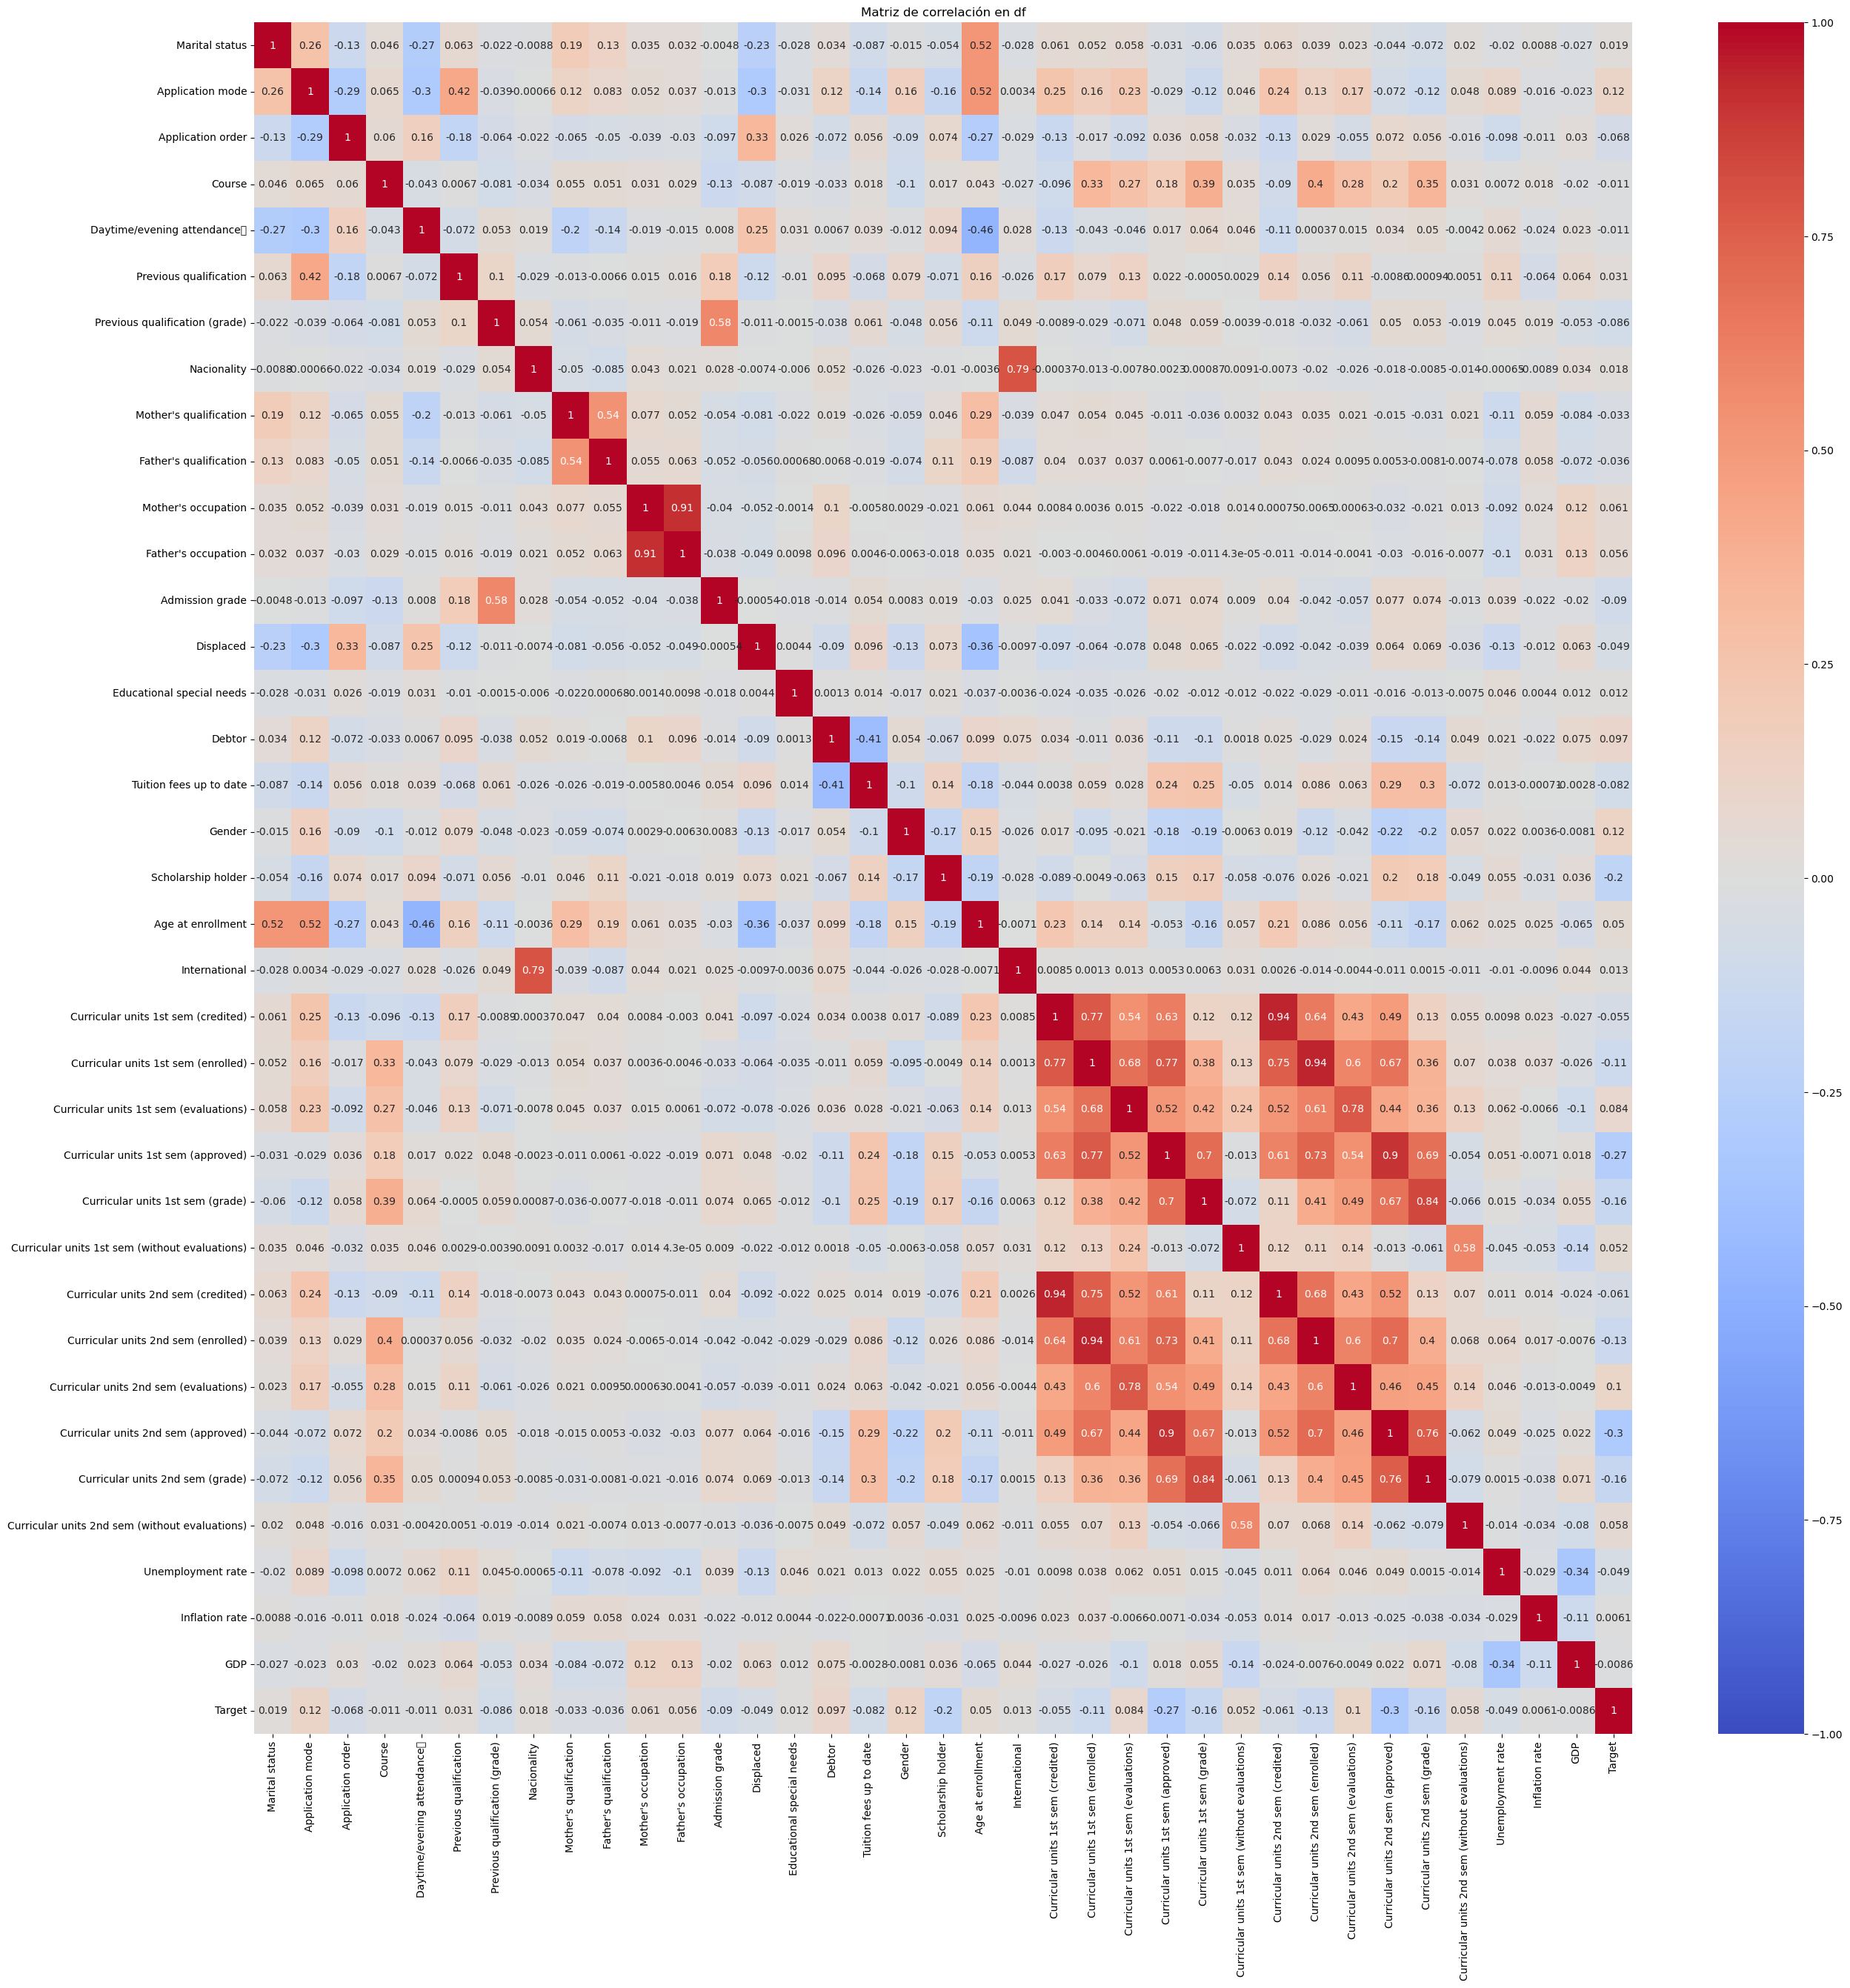

In [60]:
corr_matrix = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.title("Matriz de correlación en df")
plt.show()
# Mejor reducir la dimensionalidad cuando nos enseñen , así como está veo que no hay correlaciones buenas con la etiqueta

In [67]:
df.to_csv('../data/dropout_limpio.csv', index = False)